In [2]:
import pandas as pd
import numpy as np
import tqdm
import pickle

In [2]:
ds = pd.read_csv('DataSet/data.csv')

In [ ]:
fh = open('DataSet/data.csv')

In [126]:
print(fh.readline().split(','))

['1.00009', '-0.0865052', '-1374.48', '-2.07612', '0.000177763', '0.999911', '0.998495', '0.75', '1.03806', '0.0042697', '1.00009', '0', '0', '1.90311', '0.0909091', '-1.04545', '0.532106', '0', '0', '1.00009', '0', '0', '1.16782', '0.777778', '-1.07407', '0.81758', '0', '0', '1.00004', '0.000178031', '4.45077e-005', '0.821799', '1.52632', '-1.10526', '0.894445', '0', '0.000178031', '1.00002', '0', '7.23251e-005', '0.594723', '2.49091', '-1.14545', '0.692111', '0', '0.000178031', '1.00019', '-0.000712124', '-0.000102924', '1.75714', '0.181538', '-1.04923', '0.179243', '0.000712124', '0.000178031', '1.00061', '-0.00106819', '-0.000518793', '1.0651', '0.949239', '-1.08122', '0.128558', '0.00106819', '0.000178031', '1.00114', '-0.0023144', '-0.00104941', '0.815041', '1.54726', '-1.10614', '0.0636698', '0.0023144', '0.000178031', '1.00009', '0', '0', '2.07612', '0', '0', '0.5', '0', '0', '0.0266667', '0.0533333', '0.626667', '0.0533333', '0.24', '0.0103093', '0.28866', '0.0412371', '0.6391

In [3]:
ds.head()

,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8,indicator9,indicator10,...,AskVolume2,AskVolume1,BidVolume1,BidVolume2,BidVolume3,BidVolume4,BidVolume5,OpenInterest,UpperLimitPrice,LowerLimitPrice
0,1.00009,-0.086505,-1374.480,-2.07612,0.000178,0.999911,0.998495,0.750000,1.038060,0.004270,...,4,2,1,28,4,62,2,89336,5869,5311
1,1.00009,-0.086505,-1374.480,0.00000,0.000178,0.999911,0.998506,0.500000,0.000000,0.000000,...,4,2,1,28,4,62,2,89336,5869,5311
2,1.00009,-0.086505,-1374.480,0.00000,0.000178,1.000090,0.998516,0.500000,0.000000,0.000712,...,4,2,1,28,4,62,2,89336,5869,5311
3,1.00009,0.000000,490.311,1.03806,0.000178,1.000090,0.998703,0.666667,0.346021,0.002134,...,47,2,2,1,28,7,62,89340,5869,5311
4,1.00009,0.000000,571.371,0.00000,0.000178,1.000090,0.998712,0.500000,0.000000,0.000000,...,47,2,2,1,28,7,62,89340,5869,5311


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721577 entries, 0 to 1721576
Columns: 139 entries, indicator1 to LowerLimitPrice
dtypes: float64(111), int64(27), object(1)
memory usage: 1.8+ GB


In [5]:
ds.columns.values

array(['indicator1', 'indicator2', 'indicator3', 'indicator4',
       'indicator5', 'indicator6', 'indicator7', 'indicator8',
       'indicator9', 'indicator10', 'indicator11', 'indicator12',
       'indicator13', 'indicator14', 'indicator15', 'indicator16',
       'indicator17', 'indicator18', 'indicator19', 'indicator20',
       'indicator21', 'indicator22', 'indicator23', 'indicator24',
       'indicator25', 'indicator26', 'indicator27', 'indicator28',
       'indicator29', 'indicator30', 'indicator31', 'indicator32',
       'indicator33', 'indicator34', 'indicator35', 'indicator36',
       'indicator37', 'indicator38', 'indicator39', 'indicator40',
       'indicator41', 'indicator42', 'indicator43', 'indicator44',
       'indicator45', 'indicator46', 'indicator47', 'indicator48',
       'indicator49', 'indicator50', 'indicator51', 'indicator52',
       'indicator53', 'indicator54', 'indicator55', 'indicator56',
       'indicator57', 'indicator58', 'indicator59', 'indicator60',
    

09:00-11:30, 13:30-15:00

In [19]:
ds.loc[:,['UpdateTime','UpdateMillisec']]

,UpdateTime,UpdateMillisec
0,09:01:06,395
1,09:01:06,637
2,09:01:06,943
3,09:01:07,185
4,09:01:07,340
5,09:01:07,684
6,09:01:07,747
7,09:01:08,156
8,09:01:08,234
9,09:01:08,614


In [3]:
am_pm = ds['UpdateTime'] < '12:00:00'
ds['am_pm'] = am_pm

In [4]:
tmp = am_pm.astype(int)
# print(tmp)
z = tmp[:-1].values - tmp[1:].values

In [5]:
end_day = np.where(z==-1)[0].tolist()
day = np.zeros(len(ds),dtype=int)
prev_day = 0
cnt = 0
for i in end_day:
    day[prev_day:i+1] = cnt
    cnt+=1
    prev_day = i+1
day[prev_day:] = cnt
day
# ds.loc[np.where(z==-1)[0], 'UpdateTime'

array([ 0,  0,  0, ..., 44, 44, 44])

In [6]:
ds['Day'] = day
ds.loc[:,['Day', 'UpdateTime','UpdateMillisec','am_pm']]

,Day,UpdateTime,UpdateMillisec,am_pm
0,0,09:01:06,395,True
1,0,09:01:06,637,True
2,0,09:01:06,943,True
3,0,09:01:07,185,True
4,0,09:01:07,340,True
5,0,09:01:07,684,True
6,0,09:01:07,747,True
7,0,09:01:08,156,True
8,0,09:01:08,234,True
9,0,09:01:08,614,True


### Change Time To Num

In [7]:
def convert(x):
    if x < '12:00:00':
        return (int(x[:2]) - 9)*60 + int(x[3:5])
    else:
        return (int(x[:2]) - 13)*60 + int(x[3:5]) - 30
        

convert('14:01:03')

ds['UpdateMinute'] = ds['UpdateTime'].map(convert)
ds['UpdateMinute']

0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
           ..
1721547    89
1721548    89
1721549    89
1721550    89
1721551    89
1721552    89
1721553    89
1721554    89
1721555    89
1721556    89
1721557    89
1721558    89
1721559    89
1721560    89
1721561    89
1721562    89
1721563    89
1721564    89
1721565    89
1721566    89
1721567    89
1721568    89
1721569    89
1721570    89
1721571    89
1721572    89
1721573    89
1721574    89
1721575    89
1721576    89
Name: UpdateMinute, Length: 1721577, dtype: int64

In [8]:
ds.to_csv('DataSet/Dataset_Modified.csv', index=False)

### Generate Label

In [9]:
n = 10
ds['label'] = np.nan

In [10]:
def get_label(df, offset):
    label = df['midPrice'] - df['midPrice'].shift(-offset)
    return label

In [11]:
for d in range(45):
    ds.loc[(ds['Day']== d) & (ds['am_pm']==True),['label']] = get_label(ds[(ds['Day']==d) & (ds['am_pm']==True)],n)
    ds.loc[(ds['Day']== d) & (ds['am_pm']==False),['label']] = get_label(ds[(ds['Day']==d) & (ds['am_pm']==False)],n)

In [12]:
d = 10
ds[(ds['Day']== d) & (ds['am_pm']==True)].loc[:,['midPrice','label','am_pm']] #.dropna()
    

,midPrice,label,am_pm
383331,5158.5,0.0,True
383332,5158.5,1.0,True
383333,5159.0,1.5,True
383334,5159.0,1.5,True
383335,5159.0,1.5,True
383336,5161.0,3.5,True
383337,5161.0,3.5,True
383338,5159.5,2.0,True
383339,5160.0,2.5,True
383340,5159.5,4.0,True


In [13]:
len(ds.dropna())

1720677

In [14]:
len(ds)

1721577

In [15]:
ds_with_label = ds.dropna()

### Splitting

In [17]:
TrainSet = ds_with_label[ds_with_label['Day']<=30]
ValSet = ds_with_label[(ds_with_label['Day']>30) & (ds_with_label['Day']<=40)]
DevSet = ds_with_label[ds_with_label['Day']>40]

In [71]:
del TraingSet, TrainSet, ValSet, DevSet, ds

NameError: name 'TraingSet' is not defined

In [18]:
TrainSet.to_csv('DataSet/TrainSet.csv', index=False)
ValSet.to_csv('DataSet/ValSet.csv', index=False)
DevSet.to_csv('DataSet/DevSet.csv', index=False)

## Data Preprocessing

In [18]:
df_train = pd.read_csv('DataSet/TrainSet.csv')
features = df_train.columns.values

In [19]:
indicators = features[:108].tolist()
market_stat = ['midPrice',  'LastPrice', 'Volume', 'LastVolume', 'Turnover', 'LastTurnover',
       'OpenInterest', 'UpperLimitPrice', 'LowerLimitPrice',
       'UpdateMinute']
pca_feature = indicators + market_stat

In [20]:
pca_feature

['indicator1',
 'indicator2',
 'indicator3',
 'indicator4',
 'indicator5',
 'indicator6',
 'indicator7',
 'indicator8',
 'indicator9',
 'indicator10',
 'indicator11',
 'indicator12',
 'indicator13',
 'indicator14',
 'indicator15',
 'indicator16',
 'indicator17',
 'indicator18',
 'indicator19',
 'indicator20',
 'indicator21',
 'indicator22',
 'indicator23',
 'indicator24',
 'indicator25',
 'indicator26',
 'indicator27',
 'indicator28',
 'indicator29',
 'indicator30',
 'indicator31',
 'indicator32',
 'indicator33',
 'indicator34',
 'indicator35',
 'indicator36',
 'indicator37',
 'indicator38',
 'indicator39',
 'indicator40',
 'indicator41',
 'indicator42',
 'indicator43',
 'indicator44',
 'indicator45',
 'indicator46',
 'indicator47',
 'indicator48',
 'indicator49',
 'indicator50',
 'indicator51',
 'indicator52',
 'indicator53',
 'indicator54',
 'indicator55',
 'indicator56',
 'indicator57',
 'indicator58',
 'indicator59',
 'indicator60',
 'indicator61',
 'indicator62',
 'indicator63',
 

In [ ]:
data_indicators = df_train[pca_feature].values

In [31]:
data_indicators.shape

(1230237, 118)

### PCA

In [16]:
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [22]:
pca = decomposition.PCA(n_components=64, whiten=True)

In [35]:
pca.fit(data_indicators)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [25]:
pca.singular_values_

array([9.09979308e+16, 7.56962088e+12, 1.50709479e+09, 1.16018811e+09,
       6.38450460e+08, 4.38139966e+08, 3.32445628e+08, 2.62950279e+08,
       2.00528565e+08, 1.48133581e+08, 1.06177614e+08, 7.50929072e+07,
       4.30428899e+06, 1.62792254e+05, 8.71817326e+04, 6.96001242e+04,
       4.47480869e+04, 4.09461647e+04, 3.47508160e+04, 2.52000424e+04,
       2.08925607e+04, 1.75132015e+04, 1.18875797e+04, 5.57881861e+03,
       4.19515554e+03, 3.58901018e+03, 2.69953571e+03, 2.42730456e+03,
       2.06189512e+03, 1.68378483e+03, 1.34783886e+03, 1.17990217e+03,
       1.00813354e+03, 9.57882030e+02, 8.14725208e+02, 7.04824163e+02,
       6.65050507e+02, 6.08851344e+02, 5.25139242e+02, 5.15846670e+02,
       4.82336782e+02, 4.68900639e+02, 4.51486018e+02, 3.84530783e+02,
       3.74590402e+02, 3.34525587e+02, 2.50238435e+02, 2.25198140e+02,
       2.12417596e+02, 2.12102143e+02, 2.03056962e+02, 1.93315449e+02,
       1.90984486e+02, 1.88531951e+02, 1.81213157e+02, 1.79175184e+02,
      

In [ ]:
pca.transform(data_indicators[:1,:])

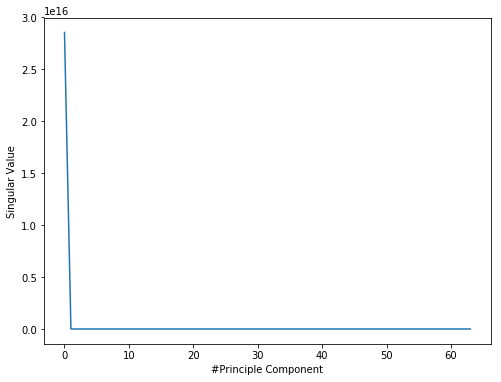

In [36]:
plt.figure(figsize=(8,6))
plt.xlabel('#Principle Component')
plt.ylabel('Singular Value')
plt.plot(pca.singular_values_)

### Save PCA transformation

In [27]:
joblib.dump(pca,'pca_X.model')

['pca_X.model']

## Plotting

In [3]:
df_train = pd.read_csv('DataSet/TrainSet.csv')
df_val = pd.read_csv('DataSet/ValSet.csv')

In [4]:
indicators = df_train.columns.values[:108].tolist()
market_stat = ['midPrice',  'LastPrice', 'Volume', 'LastVolume', 'Turnover', 'LastTurnover',
       'OpenInterest', 'UpperLimitPrice', 'LowerLimitPrice',] # 'UpdateMinute']
features = indicators + market_stat
train_data = df_train[features].values
train_label = df_train['label'].values
train_date = df_train[['Day', 'am_pm']]

val_data = df_val[features].values
val_label = df_val['label'].values
val_date = df_val[['Day', 'am_pm']]
val_date['Day'] -= 31

/usr/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [7]:
labels = df_val[(df_val['Day']==31) & (df_val['am_pm']==True)]['label'].values

In [8]:
labels.shape

(22591,)

In [9]:
labels

array([-1.5,  0. ,  0. , ...,  0. ,  0. ,  0. ])

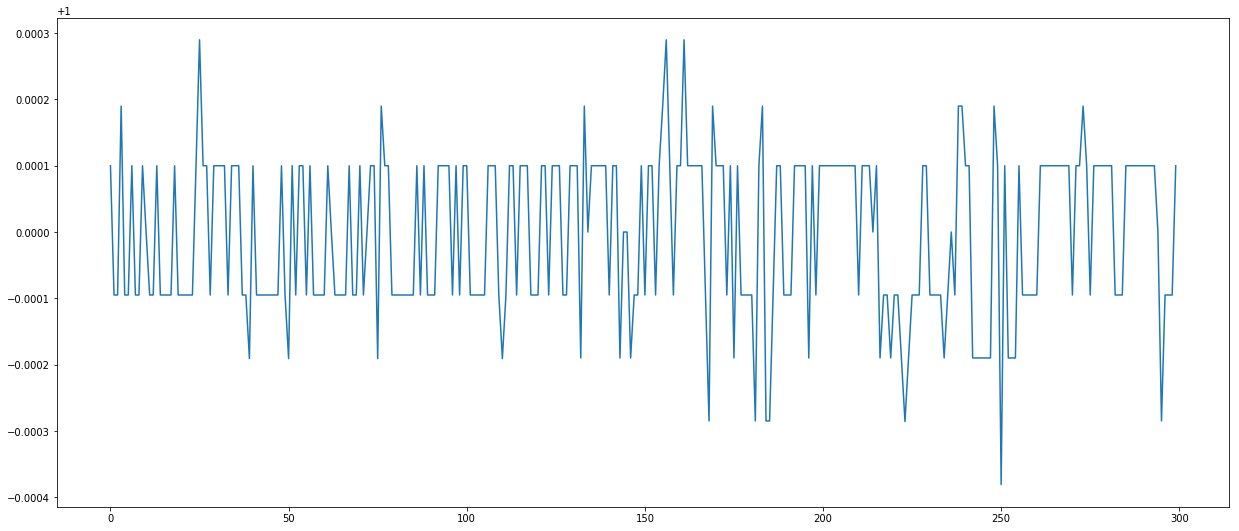

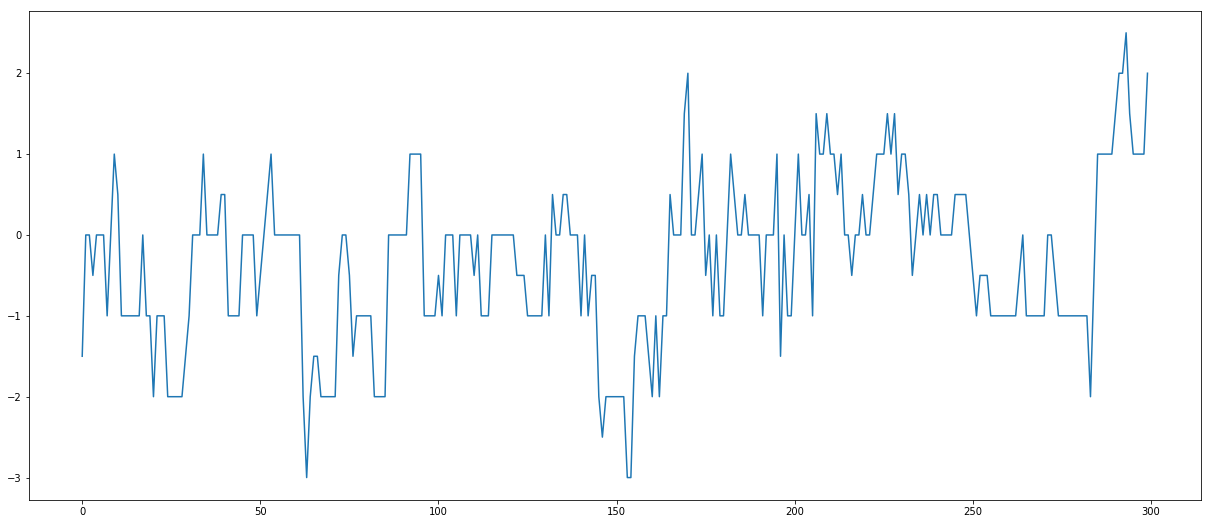

In [27]:
plt.figure(figsize=(21,9))
plt.plot(df_val[(df_val['Day']==31) & (df_val['am_pm']==True)]['indicator1'].values[:300])
plt.figure(figsize=(21,9))
plt.plot(df_val[(df_val['Day']==31) & (df_val['am_pm']==True)]['label'].values[:300])

-23.0         1
-19.0         3
-17.5         3
-17.0         2
-16.5         3
-16.0         3
-15.5         4
-15.0         8
-14.5         3
-14.0         3
-13.5         3
-13.0         6
-12.5         4
-12.0         6
-11.5         5
-11.0         6
-10.5         9
-10.0        13
-9.5         15
-9.0         21
-8.5         19
-8.0         50
-7.5         29
-7.0        110
-6.5         62
-6.0        292
-5.5        153
-5.0        784
-4.5        403
-4.0       2124
          ...  
-1.5      14608
-1.0     177256
-0.5      70132
 0.0     609092
 0.5      70500
 1.0     180747
 1.5      14382
 2.0      29978
 2.5       3644
 3.0       7373
 3.5       1248
 4.0       2371
 4.5        494
 5.0        843
 5.5        178
 6.0        330
 6.5        105
 7.0        135
 7.5         46
 8.0         54
 8.5         16
 9.0         33
 9.5          7
 10.0        16
 10.5         8
 11.0         8
 12.0         2
 12.5         1
 13.0         2
 14.0         2
Name: label, Length: 64,

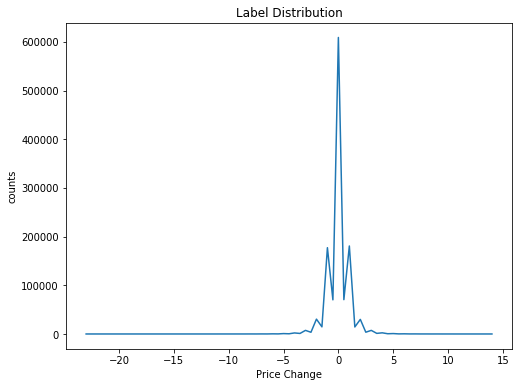

In [15]:
class_list = df_train['label'].astype('category').cat.categories.sort_values()
class_list
# df_train['label'].astype('category').value_counts()
plt.figure(figsize=(8,6))
plt.plot(df_train['label'].value_counts(sort=False)[class_list])
plt.title("Label Distribution")
plt.xlabel("Price Change")
plt.ylabel("counts")
df_train['label'].value_counts(sort=False)[class_list]

-11.0         1
-10.0         1
-8.0          2
-7.5          2
-7.0          3
-6.5          2
-6.0         17
-5.5          7
-5.0         54
-4.5         38
-4.0        192
-3.5         97
-3.0        835
-2.5        523
-2.0       5362
-1.5       3298
-1.0      48764
-0.5      24693
 0.0     193420
 0.5      24082
 1.0      48707
 1.5       3412
 2.0       5616
 2.5        538
 3.0       1002
 3.5        130
 4.0        197
 4.5         51
 5.0         73
 5.5         24
 6.0         30
 6.5          4
 7.0         18
 7.5          8
 8.0         13
 8.5          6
 9.0         14
 9.5          3
 10.0         4
 11.0         2
 11.5         2
 13.0         1
Name: label, dtype: int64

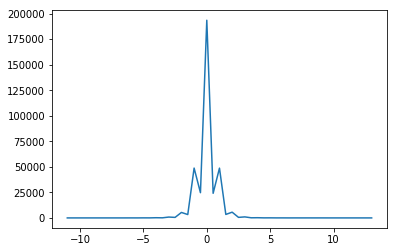

In [73]:
class_list = df_val['label'].astype('category').cat.categories.sort_values()
class_list
# df_train['label'].astype('category').value_counts()
plt.plot(df_val['label'].value_counts(sort=False)[class_list])
df_val['label'].value_counts(sort=False)[class_list]

### Class_Map:

$|y|>=10$ is extreme condition

In [99]:
classes = []
classes_range = []
z = 0
for i in range(-10,11):
    classes.append(z)
    classes_range.append(i+0.5)
    z+=1
    print(f"{i:2d}|",end='')
print()
for i in classes:
    print(f"{i:2d}|",end='')
print()
classes_range.pop()
print(classes_range)

-10|-9|-8|-7|-6|-5|-4|-3|-2|-1| 0| 1| 2| 3| 4| 5| 6| 7| 8| 9|10|
 0| 1| 2| 3| 4| 5| 6| 7| 8| 9|10|11|12|13|14|15|16|17|18|19|20|
[-9.5, -8.5, -7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]


In [87]:
def class_map(x):
    p = 0
    for i in classes_range:
        if x<i:
            return p
        p+=1
    return p

df_train['class'] = df_train['label'].map(class_map)

,class,label
0,9,-1.0
1,9,-1.0
2,9,-1.0
3,10,0.0
4,10,0.0
5,10,0.0
6,10,0.0
7,10,0.0
8,10,0.0
9,10,0.0


679224.0

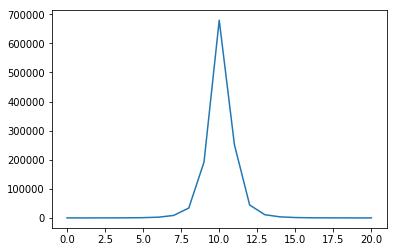

In [103]:
# class_list = df_train['class'].astype('category').cat.categories.sort_values()
# class_list
# df_train['label'].astype('category').value_counts()
class_cnt = df_train['class'].value_counts(sort=False)[classes]
class_cnt
plt.plot(class_cnt)
max_cnt = class_cnt.max()
max_cnt

In [101]:
((class_cnt /max_cnt)**-0.5).values

array([ 89.39166957, 137.35841195,  99.21605761,  69.90353065,
        43.80310337,  26.92382234,  16.39471572,   8.9507578 ,
         4.46951775,   1.88152401,   1.        ,   1.6442054 ,
         3.91300806,   7.85190139,  13.69973669,  22.53931992,
        36.56576429,  53.19868419,  82.41504717, 117.73578167,
       121.51435771,          nan])